In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Section 1 Load and Visualise the Data

- Downlaod
- Load 
- Visualise 
- Normalisation

In [15]:
x= pd.read_csv('./Training Data/Linear_X_Train.csv')
y= pd.read_csv('./Training Data/Linear_Y_Train.csv')

# convert x,y numpy arrays
x=x.values
y=y.values

# Normalisation
u= x.mean()
std=x.std()
x=(x-u)/std

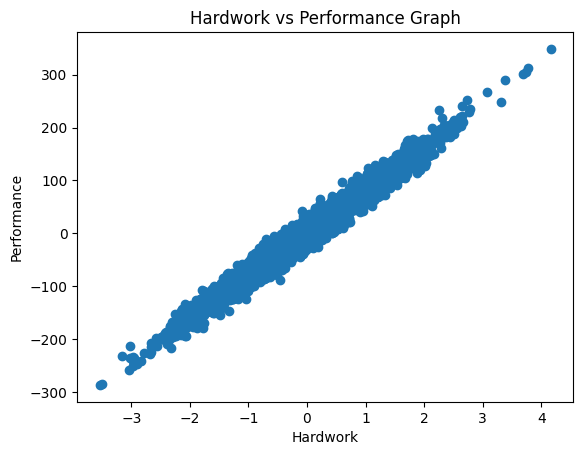

In [18]:
# Visualise
plt.scatter(x,y)
plt.title("Hardwork vs Performance Graph")
plt.xlabel("Hardwork")
plt.ylabel("Performance")
plt.show()


### Section 2 Linear Regression

In [31]:
def hypothesis(x,theta):
    y_ =theta[0] + theta[1]*x
    return y_

def gradient(x,Y,theta):
    m=x.shape[0]
    grad=np.zeros((2,))
    for i in range(m):
        y_= hypothesis(x[i],theta)
        y= Y[i]
        grad[0]+=(y_ -y)
        grad[1]+=(y_ -y)*x[i]
        
    return grad/m

def error(x,y,theta):
    m=x.shape[0]
    total_error=0.0
    for i in range(m):
        y_= hypothesis(x[i],theta)
        total_error+= (y_-y[i])**2
    return total_error/m

def gradientDescent(x,y,max_steps=100,learning_rate=0.1):
    
    theta= np.zeros((2,))
    error_list=[]
    for i in range(max_steps):
        
        #computing grad
        grad= gradient(x,y,theta)
        e= error(x,y,theta)
        error_list.append(e)
        #updating theta
        theta[0]=theta[0] - learning_rate*grad[0]
        theta[1]=theta[1] - learning_rate*grad[1]
    return theta,error_list



In [32]:
theta, error_list=gradientDescent(x,y)

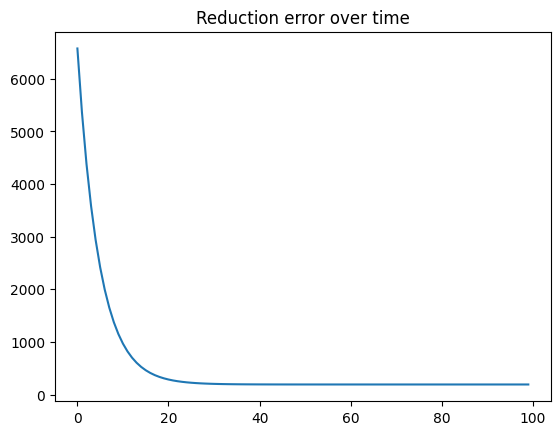

In [38]:
plt.plot(error_list)
plt.title("Reduction error over time")
plt.show()

### Section - 3 Prediction and Best Line

In [42]:
y_=hypothesis(x,theta)
print(y_)

[[-19.5733619 ]
 [-43.69571729]
 [ 86.4848761 ]
 ...
 [-20.85044708]
 [138.70197319]
 [-35.87897262]]


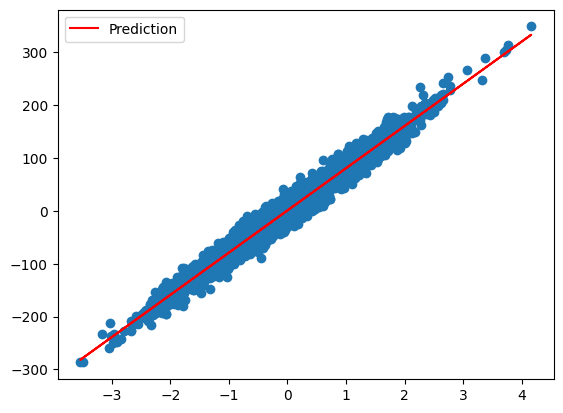

In [51]:
# Trainin + predictions
plt.scatter(x,y)
plt.plot(x,y_,color="red",label="Prediction")
plt.legend()
plt.show()

In [64]:
# Load the test data
x_test= pd.read_csv('./Test Cases/Linear_X_Test.csv')
y_test= hypothesis(x_test,theta)

In [86]:
df= pd.DataFrame(data=y_test )
df.columns=['y']
df.head()

,y
0,-149.370696
1,-68.754940
2,-201.486870
3,221.234243
4,47.906897


In [88]:
df.to_csv('y_prediction.csv',index=False)

### Sction -4 Computing Score
 Score : R2 (R-Squared) or Coefficient of Determination 


In [93]:
def r2_score(y,y_):
    # np.sum is fast as comparision to loop
    num= np.sum((y-y_)**2)
    denom= np.sum((y-y.mean())**2)
    
    score =(1-num/denom)
    return score*100

In [95]:
r2_score(y,y_)

97.09612226971643

### Section - 5 Visualising Loss Function, Gradient Descent, Theta Updates

In [98]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

In [121]:
T0= np.arange(-40,40,1)
T1= np.arange(40,120,1)
T0,T1= np.meshgrid(T0,T1)
J= np.zeros(T0.shape)
for i in range(J.shape[0]):
    for j in range(J.shape[1]):
        y_= T1[i,j]*x + T0[i,j]
        J[i,j]= np.sum((y-y_)**2)

# print(J)
# print(T0)
# print(T1)

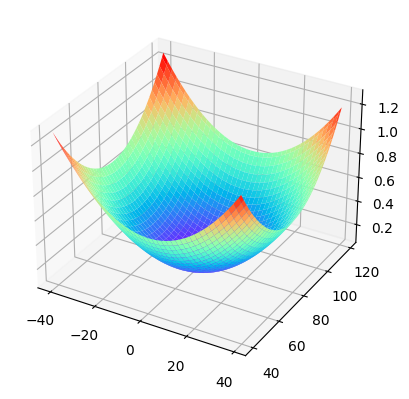

In [125]:
fig= plt.figure()
axes= fig.add_subplot(projection='3d')
axes.plot_surface(T0,T1,J,cmap='rainbow')
plt.show()

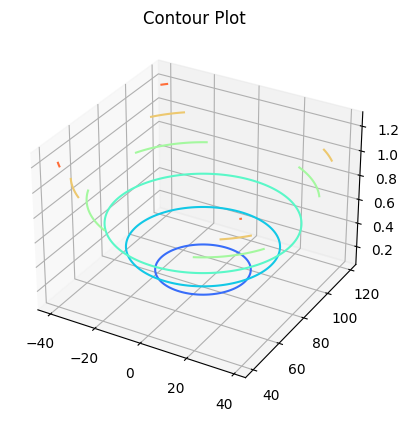

In [127]:
fig= plt.figure()
axes= fig.add_subplot(projection='3d')
axes.contour(T0,T1,J,cmap='rainbow')
plt.title('Contour Plot')
plt.show()